In [1]:
import zastro as z
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt
import glob
from uncertainties import ufloat
import numpy as np
import pandas as pd
import os
import warnings
from scipy.optimize import OptimizeWarning
import matplotlib.gridspec as gridspec

In [2]:
def F(x, A_0,
      A_1, phi_1,A_2, phi_2,A_3, phi_3,A_4, phi_4,A_5, phi_5,A_6, phi_6,freq):
    return (A_0+A_1*np.sin(2*np.pi*1*freq*x+phi_1)+
                A_2*np.sin(2*np.pi*2*freq*x+phi_2)+
                A_3*np.sin(2*np.pi*3*freq*x+phi_3)+
                A_4*np.sin(2*np.pi*4*freq*x+phi_4)+
                A_5*np.sin(2*np.pi*5*freq*x+phi_5)+
                A_6*np.sin(2*np.pi*6*freq*x+phi_6))

In [9]:
objlist=glob.glob("EPIC*eap")

In [4]:
f=open("periodlistfileC3",'w')

for index, line in enumerate(objlist):
    
    if index<<
    print("###")
    print(line)
    print("###")
    
    resdict=z.csvtodict(objlist[index],skipheader=True,headers=['BJD','flux','EAPflux','fluxerror'])

    BJD=resdict['BJD'];flux=resdict['flux'];fluxerror=resdict['fluxerror']

    period=z.period(BJD,flux)

    LSPfreq=1/period

    pfit, pcov=optimize.curve_fit(lambda x, _A_0, 
                                      _A_1, _phi_1,
                                      _A_2, _phi_2,
                                      _A_3, _phi_3,
                                      _A_4, _phi_4,
                                      _A_5, _phi_5,
                                      _A_6, _phi_6,_freqfit:

                                      F(x, _A_0,_A_1, _phi_1,
                                                _A_2, _phi_2,
                                                _A_3, _phi_3,
                                                _A_4, _phi_4,
                                                _A_5, _phi_5,
                                                _A_6, _phi_6,_freqfit),

                                      BJD, flux, p0=[100, 100, 0,
                                                          100, 0,
                                                          100, 0,
                                                          100, 0,
                                                          100, 0,
                                                          100, 0,
                                                          LSPfreq],

                                                     sigma=fluxerror, absolute_sigma=True)

    error = [] # DEFINE LIST TO CALC ERROR
    for i in range(len(pfit)): 
        try:error.append(np.absolute(pcov[i][i])**0.5) # CALCULATE SQUARE ROOT OF TRACE OF COVARIANCE MATRIX
        except:error.append( 0.00 )     
    perr_curvefit = np.array(error)


    betterfreq=pfit[13]

    period=1/betterfreq

    f.write(objlist[index][5:])
    f.write(" "+str(period)+"\n")

f.close()

In [5]:
!pwd

/home/pal/oosterhoff


In [10]:
resdict=z.csvtodict(objlist[0],skipheader=True,headers=['BJD','flux','EAPflux','fluxerror'])

In [14]:
resdict['BJD']

[2144.102759,
 2144.123192,
 2144.143624,
 2144.164056,
 2144.184488,
 2144.20492,
 2144.225352,
 2144.245784,
 2144.266217,
 2144.286649,
 2144.307081,
 2144.327513,
 2144.347945,
 2144.368377,
 2144.38881,
 2144.409242,
 2144.429674,
 2144.450106,
 2144.470538,
 2144.49097,
 2144.511403,
 2144.531835,
 2144.552267,
 2144.572699,
 2144.593131,
 2144.613563,
 2144.633995,
 2144.654427,
 2144.67486,
 2144.695292,
 2144.715724,
 2144.736156,
 2144.756588,
 2144.77702,
 2144.797453,
 2144.817885,
 2144.838317,
 2144.858749,
 2144.879181,
 2144.899613,
 2144.920046,
 2144.940478,
 2144.96091,
 2144.981342,
 2145.001774,
 2145.022206,
 2145.042638,
 2145.06307,
 2145.083503,
 2145.103935,
 2145.124367,
 2145.144799,
 2145.165231,
 2145.185663,
 2145.206095,
 2145.226528,
 2145.24696,
 2145.267392,
 2145.287824,
 2145.308256,
 2145.328688,
 2145.34912,
 2145.369552,
 2145.389985,
 2145.410417,
 2145.430849,
 2145.451281,
 2145.471713,
 2145.492145,
 2145.512577,
 2145.53301,
 2145.553442,
 2

In [15]:
resdict['flux']

[63659.912,
 60742.299,
 58050.316,
 55421.872,
 52823.515,
 50570.024,
 48815.693,
 47620.518,
 47093.466,
 46933.852,
 46882.766,
 46464.487,
 46073.968,
 47002.003,
 45863.343,
 43206.291,
 41951.349,
 46183.188,
 70927.668,
 102979.22,
 106744.01,
 97130.444,
 88058.727,
 80857.784,
 75109.248,
 70571.451,
 66770.307,
 63539.097,
 60682.906,
 57976.074,
 55333.579,
 52818.363,
 50499.369,
 48559.936,
 47398.727,
 46911.385,
 46738.974,
 46734.36,
 46263.146,
 46032.93,
 46979.958,
 45728.863,
 43140.856,
 42022.575,
 46738.648,
 72466.85,
 103887.825,
 106139.354,
 96323.681,
 87312.922,
 80233.242,
 74626.262,
 70187.214,
 66385.349,
 63231.906,
 60392.455,
 57711.134,
 55029.295,
 52555.896,
 50369.324,
 48546.481,
 47445.764,
 47035.132,
 46919.957,
 46873.442,
 46494.921,
 46168.584,
 47174.961,
 45734.311,
 42602.031,
 41812.863,
 46855.943,
 73762.448,
 104681.552,
 105929.067,
 95934.391,
 86949.403,
 79906.47,
 74380.094,
 69965.826,
 66149.869,
 63040.396,
 60094.421,
 574

In [23]:
period=0.5508469475996534

In [24]:
objlist[0]

'EPIC_205941274-c03-k2sc_t1.dat.flag.spline.eap'

In [27]:
modtime = []
for each in resdict['BJD']:
    modtime.append(each%period)

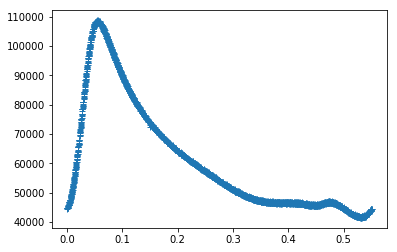

In [29]:
plt.plot(modtime,resdict['flux'],'+')

In [35]:
RANGE=np.max(modtime)-np.min(modtime)
nbins=10
bindict={}

upper_lim_of_bin=[]
for x in range(nbins):
    upper_lim_of_bin.append(x*RANGE/nbins)

n=0
for each in modtime:
    if each < upper_lim_of_bin[n]:
        bindict[n].append(each)
    else:
        n+=1

KeyError: 6